# Part II - (Loan Data from Prosper Analysis)
## by (Emmanuel Eshun)

## Investigation Overview

> The purpose of this project is to explore the variables that can affect the loan BorrowerAPR and to also get some 
knowledge about the relationships among some of the variables using summary statistics and data visualization. 


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [13]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')


## Distribution of Borrower APR

The distribution looks multimodal. A peak centered around 0.1 and around 0.2, with high counts around 0.35 about. 

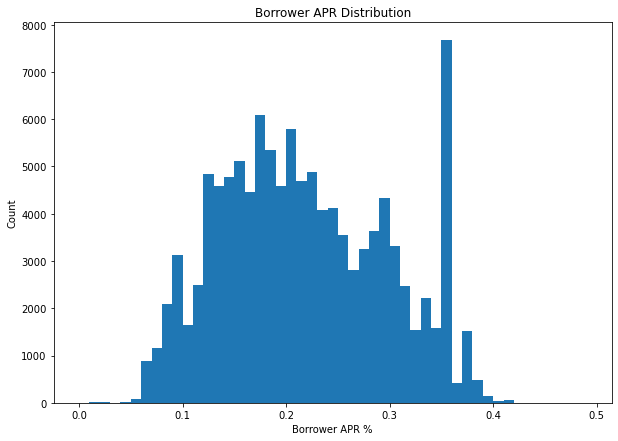

In [14]:
# Histogram of BorrowerAPR
bins = np.arange(df.BorrowerRate.min(), df.BorrowerRate.max(), 0.01)
plt.figure(figsize = [10, 7])
plt.hist(data=df, x='BorrowerAPR', bins=bins)
plt.xlabel('Borrower APR %');
plt.ylabel('Count')
plt.title('Borrower APR Distribution');

## Plot of Applicants States
Visually it can be estimated as the number of people in the scheme are still on going compared to cancelled which turned out to be the lowest.

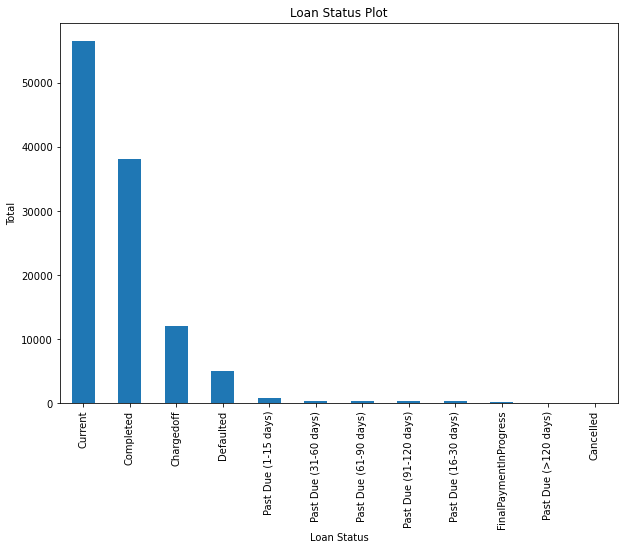

In [15]:
status = df['LoanStatus'].value_counts()
status
plt.figure(figsize = [10, 7])
status.plot(xlabel="Loan Status", ylabel="Total",kind="bar");
plt.title('Loan Status Plot');

## Correlation between the attributes

There's a negative correlation between borrowerAPR and MonthlyLoanPayment, StatedMonthlyincome, whereas a positive one between the statedMonthlyincome and the monthly loan Payment

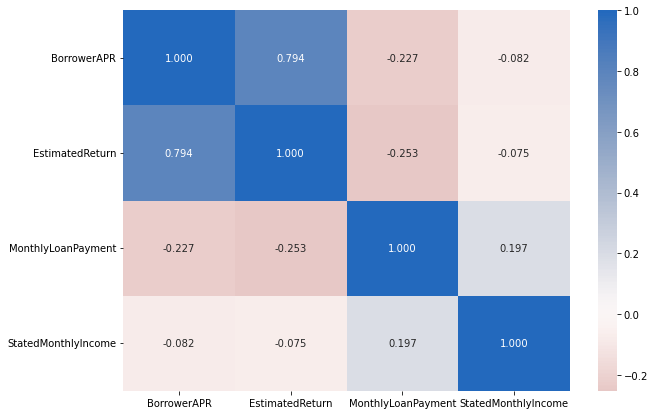

In [16]:
numeric_vars = ['BorrowerAPR', 'EstimatedReturn', 'MonthlyLoanPayment', 'StatedMonthlyIncome']

# correlation plot
plt.figure(figsize = [10, 7])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

## Observed Relationships
As expected the BorrowerAPR and the EstimatedReturn shows a strong positive relationship where most of the other variables doesnt show a strong correlation. Meaning EstimatedReturn, MonthlyLoanPayment and StatedMonthlyIncome variables doesn't have any effect on our Variable of interest thats the BorrowerAPR.

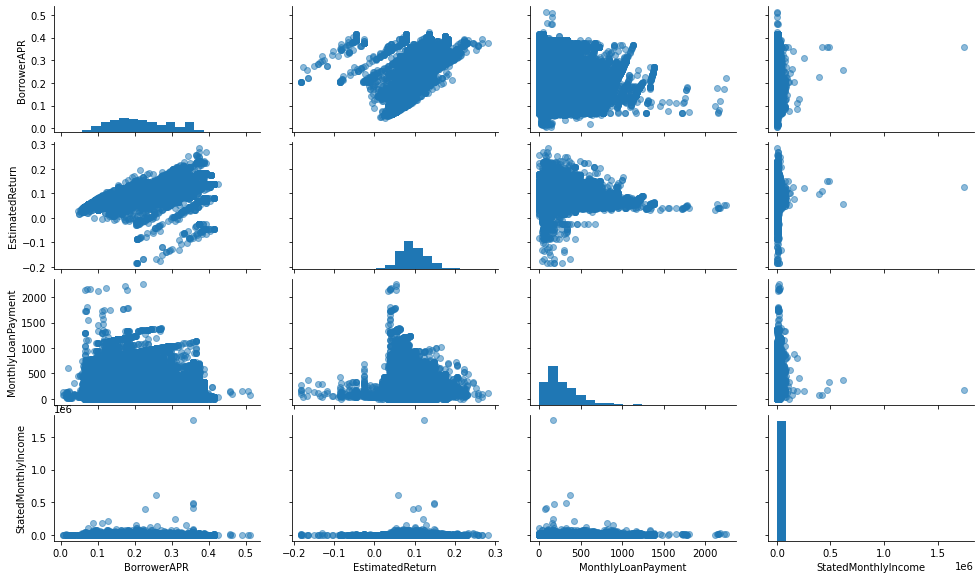

In [17]:
# plot matrix: sample 500 loans so that plots are clearer
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.reindex(samples)

# pair grid

g = sb.PairGrid(data = df, vars = numeric_vars, height = 3)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha = 1/2);
g.fig.set_size_inches(14, 8);


## Relationship between the BorrowerAPR, BorrowerRate and LenderYield

Interestingly We can see a strong positve relationship between these variables which conclude my findings that the BorrowerRate and the Lender Yield have some kind of effect on the BorrowerAPR.



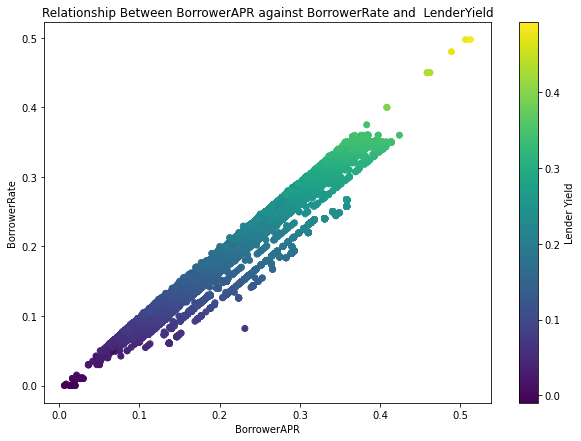

In [18]:
# plotting BorrowerAPR against BorrowerRate and  LenderYield

plt.figure(figsize = [10,7])
plt.scatter(data = df, x = 'BorrowerAPR', y = 'BorrowerRate',
                c = 'LenderYield')
plt.colorbar(label = 'Lender Yield')
plt.xlim()
plt.ylim()
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')
plt.title('Relationship Between BorrowerAPR against BorrowerRate and  LenderYield');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt